<a href="https://colab.research.google.com/github/fatazeouedraogo/Deep-Learning-for-Healthcare-Brain-Tumor-Classification-using-VGG16/blob/main/Deep_Learning_for_Healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning for Healthcare: Brain Tumor Classification using VGG16**

In [ ]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import vgg16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model

print(tf.__version__)


2.19.0


# Connexion with Google cola

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Extrating data


In [ ]:
zip_path = '/content/drive/MyDrive/brain_tumor_dataset.zip'
extracted_path = '/content/drive/MyDrive/brain_tumor_dataset'
print(zip_path)
print(f"--->Data sucessfull extract")

/content/drive/MyDrive/brain_tumor_dataset.zip
--->Data sucessfull extract


In [ ]:
from google.colab import files
uplodeded = files.upload()

for fn in uplodeded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uplodeded[fn])))

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 71 bytes


In [ ]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
  0% 0.00/15.1M [00:00<?, ?B/s]
100% 15.1M/15.1M [00:00<00:00, 773MB/s]


In [ ]:
from zipfile import ZipFile
with ZipFile('/content/brain-mri-images-for-brain-tumor-detection.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()
   print(f"---->Data Successfull done----")


---->Data Successfull done----


In [ ]:
import os
data_dir = '/content/brain_tumor_dataset'
os.listdir(os.path.join(data_dir, 'yes'))


['Y70.jpg',
 'Y117.JPG',
 'Y51.jpg',
 'Y114.JPG',
 'Y242.JPG',
 'Y4.jpg',
 'Y194.jpg',
 'Y185.jpg',
 'Y154.jpg',
 'Y3.jpg',
 'Y46.jpg',
 'Y10.jpg',
 'Y74.jpg',
 'Y47.JPG',
 'Y97.JPG',
 'Y107.jpg',
 'Y245.jpg',
 'Y109.JPG',
 'Y17.jpg',
 'Y111.JPG',
 'Y170.JPG',
 'Y158.JPG',
 'Y34.jpg',
 'Y255.JPG',
 'Y27.jpg',
 'Y67.JPG',
 'Y86.JPG',
 'Y106.jpg',
 'Y81.jpg',
 'Y92.png',
 'Y162.jpg',
 'Y30.jpg',
 'Y99.JPG',
 'Y169.jpg',
 'Y11.jpg',
 'Y188.jpg',
 'Y42.jpg',
 'Y116.JPG',
 'Y120.JPG',
 'Y166.JPG',
 'Y101.jpg',
 'Y76.jpg',
 'Y105.jpg',
 'Y163.JPG',
 'Y37.jpg',
 'Y59.JPG',
 'Y250.jpg',
 'Y13.jpg',
 'Y1.jpg',
 'Y248.JPG',
 'Y18.JPG',
 'Y155.JPG',
 'Y249.JPG',
 'Y153.jpg',
 'Y25.jpg',
 'Y44.JPG',
 'Y254.jpg',
 'Y55.jpg',
 'Y252.jpg',
 'Y66.JPG',
 'Y90.jpg',
 'Y195.JPG',
 'Y159.JPG',
 'Y92.jpg',
 'Y32.jpg',
 'Y100.JPG',
 'Y39.jpg',
 'Y192.JPG',
 'Y146.JPG',
 'Y6.jpg',
 'Y164.JPG',
 'Y50.JPG',
 'Y182.JPG',
 'Y22.jpg',
 'Y253.JPG',
 'Y112.JPG',
 'Y28.jpg',
 'Y157.JPG',
 'Y15.jpg',
 'Y24.jpg',
 'Y8

In [ ]:
os.listdir(os.path.join(data_dir, 'no'))

['N16.jpg',
 'no 90.jpg',
 'no 96.jpg',
 'no 2.jpg',
 '18 no.jpg',
 'no 91.jpeg',
 '46 no.jpg',
 '20 no.jpg',
 '28 no.jpg',
 'no 1.jpg',
 'N20.JPG',
 'No20.jpg',
 '26 no.jpg',
 '24 no.jpg',
 '1 no.jpeg',
 '35 no.jpg',
 'no 4.jpg',
 'no 94.jpg',
 '9 no.jpg',
 '3 no.jpg',
 'No15.jpg',
 '40 no.jpg',
 'N2.JPG',
 '38 no.jpg',
 'no 99.jpg',
 'no 92.jpg',
 'N11.jpg',
 '13 no.jpg',
 '39 no.jpg',
 'No17.jpg',
 '7 no.jpg',
 '11 no.jpg',
 '36 no.jpg',
 'no 6.jpg',
 'No21.jpg',
 'N21.jpg',
 '27 no.jpg',
 '42 no.jpg',
 '23 no.jpg',
 '48 no.jpeg',
 'No13.jpg',
 'N15.jpg',
 '47 no.jpg',
 'N6.jpg',
 '19 no.jpg',
 'no 89.jpg',
 'no 7.jpeg',
 'N1.JPG',
 '49 no.jpg',
 '8 no.jpg',
 'N19.JPG',
 'No18.jpg',
 '17 no.jpg',
 '32 no.jpg',
 'no 10.jpg',
 '4 no.jpg',
 '30 no.jpg',
 '21 no.jpg',
 '6 no.jpg',
 'N5.jpg',
 'no 97.jpg',
 '41 no.jpg',
 'No12.jpg',
 '22 no.jpg',
 'No16.jpg',
 '45 no.jpg',
 '33 no.jpg',
 '2 no.jpeg',
 '12 no.jpg',
 '37 no.jpg',
 'no 95.jpg',
 'N22.JPG',
 'No11.jpg',
 '34 no.jpg',
 '29 no

Data preparetion


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    'brain_tumor_dataset',
    target_size=(224, 224),
    batch_size=16,  # Réduire le batch_size si peu de données
    class_mode='binary',
    subset='training',
    seed=42
)

val_generator = train_datagen.flow_from_directory(
    'brain_tumor_dataset',
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary',
    subset='validation',
    seed=42
)

# Calcul des steps corrects
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = val_generator.samples // val_generator.batch_size

Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


# Model building

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Chargement de VGG16 pré-entraîné
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Gel des couches
for layer in base_model.layers:
    layer.trainable = False

# Ajout des couches personnalisées
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model improving

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Nouvelle architecture
x = GlobalAveragePooling2D()(base_model.output)  # Meilleur que Flatten()
x = Dense(128, activation='relu')(x)
x = Dropout(0.6)(x)  # Dropout plus important
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

# Optimiseur avec learning rate réduit
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model Training

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.1, patience=3)
]

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=validation_steps,
    epochs=4,  # Augmenter avec EarlyStopping
    callbacks=callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/4
12/12 ━━━━━━━━━━━━━━━━━━━━ 425s 35s/step - accuracy: 0.6287 - loss: 0.6699 - val_accuracy: 0.6458 - val_loss: 0.6547 - learning_rate: 1.0000e-04
Epoch 2/4
 1/12 ━━━━━━━━━━━━━━━━━━━━ 6:18 34s/step - accuracy: 0.5000 - loss: 0.8028

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


12/12 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.5000 - loss: 0.8028 - val_accuracy: 0.6042 - val_loss: 0.6767 - learning_rate: 1.0000e-04
Epoch 3/4
12/12 ━━━━━━━━━━━━━━━━━━━━ 442s 37s/step - accuracy: 0.6356 - loss: 0.6657 - val_accuracy: 0.6250 - val_loss: 0.6615 - learning_rate: 1.0000e-04
Epoch 4/4
12/12 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.6875 - loss: 0.5728 - val_accuracy: 0.6250 - val_loss: 0.6609 - learning_rate: 1.0000e-04


# Model evaluation

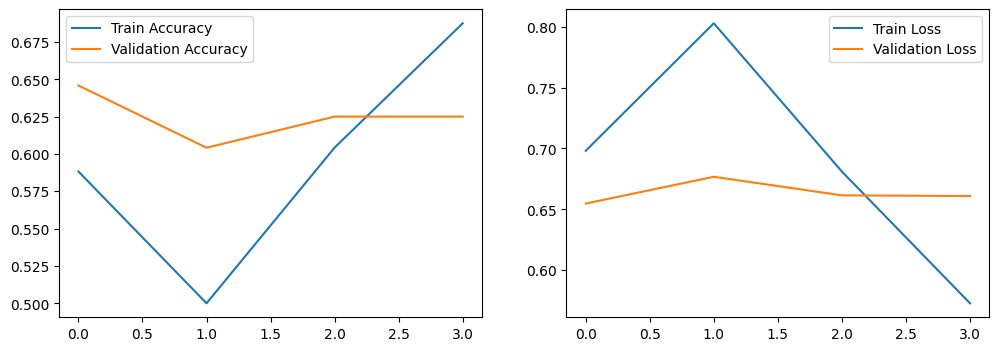

4/4 ━━━━━━━━━━━━━━━━━━━━ 32s 7s/step - accuracy: 0.6605 - loss: 0.6479

Accuracy finale: 62.00%


In [ ]:
import matplotlib.pyplot as plt

# Courbes d'apprentissage
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Évaluation finale
loss, accuracy = model.evaluate(val_generator)
print(f"\nAccuracy finale: {accuracy*100:.2f}%")

# model saving

In [ ]:
model.save('brain_tumor_classification_model.h5')
files.download('brain_tumor_classification_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Pediction

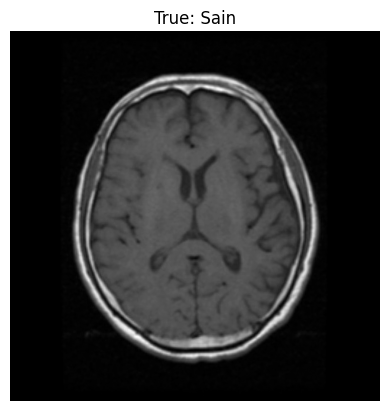

In [ ]:
import os
import random
from matplotlib import pyplot as plt
import numpy as np

# Chemin vers les dossiers
yes_dir = 'brain_tumor_dataset/yes'
no_dir = 'brain_tumor_dataset/no'

# Choisir une image aléatoire
folder = random.choice([yes_dir, no_dir])
random_image = random.choice(os.listdir(folder))
image_path = os.path.join(folder, random_image)

# Afficher l'image
img = plt.imread(image_path)
plt.imshow(img, cmap='gray')
plt.title(f"True: {'Tumeur' if folder==yes_dir else 'Sain'}")
plt.axis('off')
plt.show()

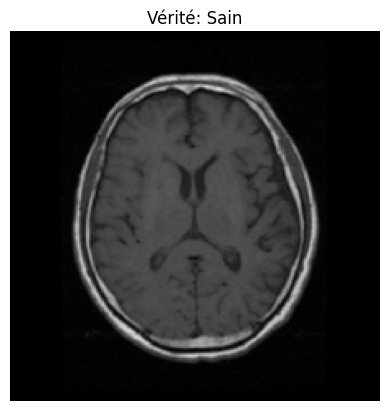

Shape de l'image après prétraitement: (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step

🔍 Résultat :
- Probabilité de tumeur : 61.50%
- Diagnostic : TUMEUR DÉTECTÉE 🚨
- Vérité terrain : Sain


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# 1. Charger l'image en la redimensionnant directement
img = image.load_img(image_path, target_size=(224, 224))  # FORCE le 224x224
plt.imshow(img)
plt.title(f"Vérité: {'Tumeur' if folder==yes_dir else 'Sain'}")
plt.axis('off')
plt.show()

# 2. Conversion en array + normalisation
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Shape devient (1, 224, 224, 3)
img_array /= 255.0  # Normalisation comme pendant l'entraînement

# 3. Vérification des dimensions
print("Shape de l'image après prétraitement:", img_array.shape)  # Doit être (1, 224, 224, 3)

# 4. Prédiction
try:
    prediction = model.predict(img_array)
    confidence = prediction[0][0] * 100

    print(f"\n🔍 Résultat :")
    print(f"- Probabilité de tumeur : {confidence:.2f}%")
    print(f"- Diagnostic : {'TUMEUR DÉTECTÉE 🚨' if confidence > 50 else 'Pas de tumeur ✅'}")
    print(f"- Vérité terrain : {'Tumeur' if folder==yes_dir else 'Sain'}")

except Exception as e:
    print("Erreur lors de la prédiction:", str(e))

# Image download

In [ ]:
from google.colab import files
import os

# Téléverser une image depuis votre PC
uploaded = files.upload()
image_name = list(uploaded.keys())[0]  # Récupère le nom du fichier

print(f"Image '{image_name}' téléchargée avec succès!")

Saving 22 no.jpg to 22 no.jpg
Image '22 no.jpg' téléchargée avec succès!


# Pred

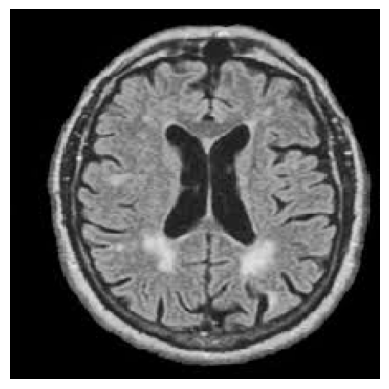

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step

🔍 Résultat d'analyse :
- Probabilité de tumeur : 60.77%
- Conclusion : TUMEUR DÉTECTÉE 🚨


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Charger et préparer l'image
img = image.load_img(image_name, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.show()

# Conversion pour le modèle
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Prédiction
prediction = model.predict(img_array)
confidence = prediction[0][0] * 100

# Résultat
print("\n🔍 Résultat d'analyse :")
print(f"- Probabilité de tumeur : {confidence:.2f}%")
print(f"- Conclusion : {'TUMEUR DÉTECTÉE 🚨' if confidence > 50 else 'Aucune tumeur détectée ✅'}")

In [ ]:
import requests
from io import BytesIO

url = "URL_DE_L_IMAGE"  # Remplacez par un lien direct
response = requests.get(url)
img = image.load_img(BytesIO(response.content), target_size=(224, 224))
# ... (reprendre à l'étape 2)

MissingSchema: Invalid URL 'URL_DE_L_IMAGE': No scheme supplied. Perhaps you meant https://URL_DE_L_IMAGE?